In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train.columns = train.columns.str.lower()

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Columns explanation:

| Variable   |      Definition      |  Key |
|----------|:-------------:|------|
| survival |  Survival | 0 = No, 1 = Yes |
| pclass |    Ticket class   |   1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex | |
| age | age in years | | 
| sibsp	| # of siblings / spouses aboard the Titanic | |	
| parch | # of parents / children aboard the Titanic | |
| ticket | Ticket number | |
| fare | Passenger fare | |	
| cabin	| Cabin number | |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |


We have 3 columns with missing data:

* Age
* Cabin
* Embarked

In [6]:
train['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

### Missing Values #1 - Cabin

The cabin is the feature with less info, lets check a few things:

* Distribution for each cabin 
* Median fare for each cabin
* Relation cabin sibsp and parch

In [7]:
cabin_mask = train['cabin'].notnull()
train['cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
F2             3
C22 C26        3
              ..
D37            1
B78            1
C110           1
C104           1
C128           1
Name: cabin, Length: 147, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E1C354108>,
      dtype=object)

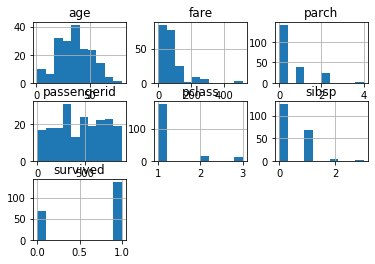

In [8]:
train[cabin_mask].hist()

In [9]:
train[cabin_mask]['pclass'].value_counts()

1    176
2     16
3     12
Name: pclass, dtype: int64

In [10]:
train['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

##### Cabin insigths

The cabin doesnt tells us to much about how the survivors taking in count 2 things
* The count of survivors remains roughly constant depending on the cabin number 
* Most of the data is for 1st class, so the other classes doent have enough representation

By this 2 inseptions, we will drop this column later.

### Missing values #2 - Age

Now we analize the age behaivior

In [11]:
train['age'].value_counts(dropna=False)

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
66.00      1
23.50      1
0.42       1
Name: age, Length: 89, dtype: int64

In [12]:
train['age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

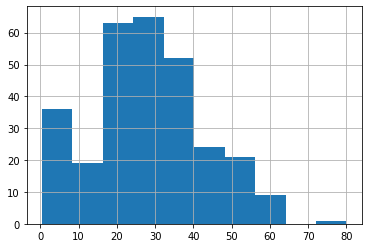

In [13]:
mask_survived = train['survived'] == 1 
mask_not_survived = train['survived'] == 0 

train[mask_survived]['age'].hist()

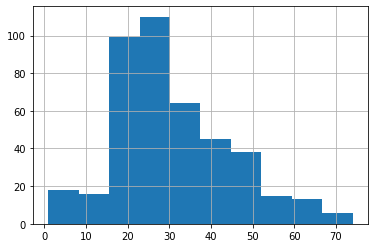

In [14]:
train[mask_not_survived]['age'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E1C3C7C08>,
      dtype=object)

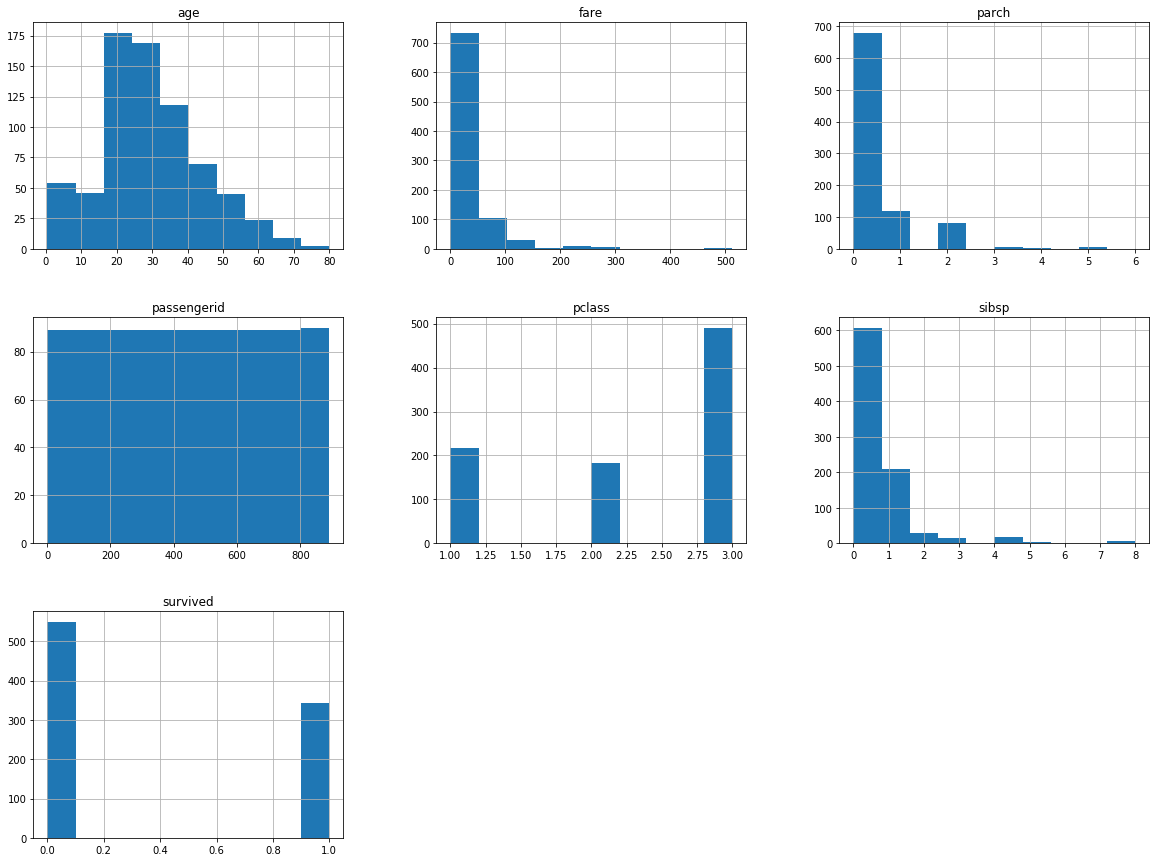

In [15]:
train.hist(bins=10, figsize=(20,15))

In [16]:
train.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
matrix_correlation = train.corr()
matrix_correlation['age']

passengerid    0.036847
survived      -0.077221
pclass        -0.369226
age            1.000000
sibsp         -0.308247
parch         -0.189119
fare           0.096067
Name: age, dtype: float64

In [18]:
# from pandas.plotting import scatter_matrix
# scatter_matrix(train[num_features],figsize=(18,12))

##### Age insights 

Looks like the age have similar behavior in both cases (survived, not survived) so using the mean won't represent a big change. Also the correlation with the other variables is relative low.

### Missing values #3 - Embarked

This column only have 2 missing values, lets find whichones are.

In [19]:
train['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [20]:
embarked_mask = train['embarked'].isnull()
train[embarked_mask]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [21]:
train[train['pclass']==1]['embarked'].value_counts()

S    127
C     85
Q      2
Name: embarked, dtype: int64

using the most frequent value will be enough

##### Null treatment criteria

We'll use the follow criteria to fill the null values in the dataset:
* Due to the low amount of data (891 datapoints), try to don't drop any row
* For the numerical data, we'll use the median value
* To the categorical data, we'll use the moda

In [22]:
#Split the data set into categorical and numerical features for a better handling.

num_features = train.describe().columns.tolist() # describe only brings numerical values. 
cat_features = [col for col in train.columns.tolist() if col not in num_features] # Rest of the columns
cat_features

['name', 'sex', 'ticket', 'cabin', 'embarked']

In [23]:
num_features.remove('survived') # took off the objetive 
num_features

['passengerid', 'pclass', 'age', 'sibsp', 'parch', 'fare']

In [24]:
cat_features_selected = cat_features
for c in ['cabin','name','ticket']:
    cat_features_selected.remove(c) # we 'drop' the unwanted columns by not selecting them
cat_features_selected

['sex', 'embarked']

In [25]:
train_prepared = train.drop(['passengerid', 'cabin','name','ticket', 'survived'], axis = 1)
train_labels = train['survived'].copy()

## Data Cleannig

In [26]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

##### Numerical features cleanning

In [27]:
train_prepared['fare'] = train_prepared['fare'].round(2)
train_prepared['age'] = train_prepared['age'].round(2)
train_prepared['fare'].value_counts()

8.05     43
13.00    42
7.90     38
7.75     34
26.00    31
         ..
10.52     1
61.18     1
7.79      1
6.95      1
71.28     1
Name: fare, Length: 236, dtype: int64

In [28]:
age_mean = train_prepared['age'].mean()
train_prepared['age'].fillna(age_mean, inplace = True)

##### Pipeline for categorical features


In [29]:
train_prepared['embarked'].fillna('S', inplace = True)
train_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    891 non-null    int64  
 1   sex       891 non-null    object 
 2   age       891 non-null    float64
 3   sibsp     891 non-null    int64  
 4   parch     891 non-null    int64  
 5   fare      891 non-null    float64
 6   embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [30]:
dummies_sex = pd.get_dummies(train_prepared['sex'], 
                             drop_first=True, 
                             columns = train_prepared['sex'].unique().tolist())

dummies_embarked = pd.get_dummies(train_prepared['embarked'], 
                                  drop_first=True, 
                                  columns = train_prepared['sex'].unique().tolist())
dummies_embarked

train_prepared = pd.concat([train_prepared, dummies_sex, dummies_embarked],                        
                            axis = 1)
train_prepared.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'male',
       'Q', 'S'],
      dtype='object')

In [31]:
# Drop gender and embarked to not be needed anymore
train_prepared.drop(['sex', 'embarked'], axis=1, inplace = True)

In [32]:
train_prepared = train_prepared.apply(pd.to_numeric, errors='coerce')
train_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  891 non-null    int64  
 1   age     891 non-null    float64
 2   sibsp   891 non-null    int64  
 3   parch   891 non-null    int64  
 4   fare    891 non-null    float64
 5   male    891 non-null    uint8  
 6   Q       891 non-null    uint8  
 7   S       891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 37.5 KB


In [33]:
scaler = MinMaxScaler()
train_prepared[train_prepared.columns] = scaler.fit_transform(train_prepared[train_prepared.columns])
train_prepared

,pclass,age,sibsp,parch,fare,male,Q,S
0,1.0,0.271174,0.125,0.000000,0.014151,1.0,0.0,1.0
1,0.0,0.472229,0.125,0.000000,0.139129,0.0,0.0,0.0
2,1.0,0.321438,0.000,0.000000,0.015459,0.0,0.0,1.0
3,0.0,0.434531,0.125,0.000000,0.103644,0.0,0.0,1.0
4,1.0,0.434531,0.000,0.000000,0.015713,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
886,0.5,0.334004,0.000,0.000000,0.025374,1.0,0.0,1.0
887,0.0,0.233476,0.000,0.000000,0.058556,0.0,0.0,1.0
888,1.0,0.367921,0.125,0.333333,0.045771,0.0,0.0,1.0
889,0.0,0.321438,0.000,0.000000,0.058556,1.0,0.0,0.0


##### First prediction

After first prediction, almoust without any value treatment, we reach a 0.44 for rmse and a 0.12 mean for the cv scores. With this terribles values, lets try a little harder with a improved pipeline:

For our model select we will use the follow:

* X = train_prepared
* y = train_labels

In [35]:
from sklearn.linear_model import SGDClassifier

lin_reg = SGDClassifier()
lin_reg.fit(train_prepared, train_labels)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# let's try the full preprocessing pipeline on a few training instances
some_data = train.iloc[:5]
some_labels = train_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

In [36]:
from sklearn.metrics import mean_squared_error

deaths_predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(train_labels, deaths_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

NameError: name 'X_train' is not defined

In [39]:
from sklearn.tree import DecisionTreeClassifier

tree_reg = DecisionTreeClassifier(random_state=42)
tree_reg.fit(train_prepared, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [40]:
deaths_predictions = tree_reg.predict(train_prepared)
tree_mse = mean_squared_error(train_labels, deaths_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.138129235668458

After doing this we can tell a base line for our models. so we can improve from here.

## Fine tune our model

In [ ]:
from sklearn.model_selection import cross_val_score

lin_reg_scores = cross_val_score(lin_reg, X_train, y_train, cv=10)
lin_reg_scores.mean()


In [ ]:
tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

In [ ]:
test = pd.read_csv('test.csv')
test.head()

In [ ]:
test.columns = test.columns.str.lower()

In [ ]:
X_test = test[cols]
predictions_test = lin_reg.predict(X_test)
predictions_test